In [1]:
from nltk.corpus import wordnet as wn
import networkx as nx
from IPython.display import Image

In [2]:
dog = wn.synset('dog.n.01')

In [3]:
dog.hypernyms()

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [4]:
dog.hyponyms()

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [5]:
dog_t = dog.tree(lambda s:s.hypernyms())

In [6]:
dog_g = nx.DiGraph()

In [7]:
dog_t[2]

[Synset('domestic_animal.n.01'),
 [Synset('animal.n.01'),
  [Synset('organism.n.01'),
   [Synset('living_thing.n.01'),
    [Synset('whole.n.02'),
     [Synset('object.n.01'),
      [Synset('physical_entity.n.01'), [Synset('entity.n.01')]]]]]]]]

In [8]:
def add(self_node, parent_list,g, parent=True):
    for n in parent_list:
        g.add_node(n[0].name())
        if parent:
            g.add_edge(self_node.name(), n[0].name())
        else:
            g.add_edge(n[0].name(), self_node.name())
    return g
        
    

In [9]:
def add_recurse(node_list,g, parent=True):
    if len(node_list) > 1: 
        add(node_list[0], node_list[1:],g)
        for parent in node_list[1:]:
            add_recurse(parent,g, parent=parent)
    return g

In [11]:
dog_g = add_recurse(dog_t,dog_g)

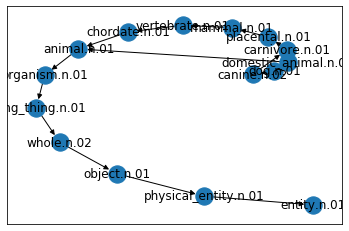

In [13]:
nx.draw_networkx(dog_g, pos=nx.spiral_layout(dog_g))

In [14]:
dog_a = nx.nx_agraph.to_agraph(dog_g)# just to draw using dot lib

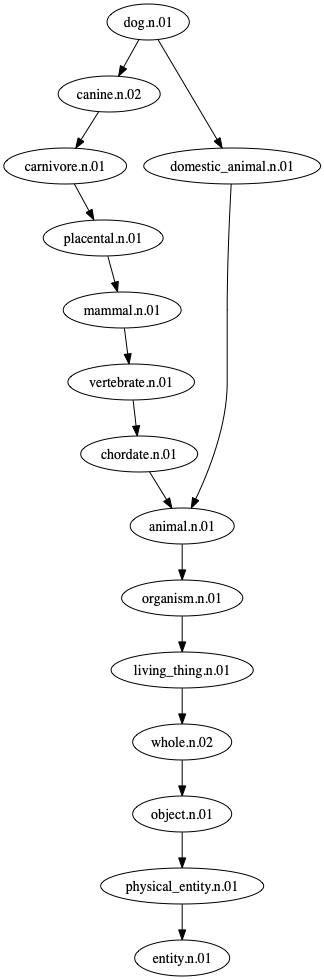

In [15]:
dog_a.layout('dot')
dog_a.draw('temp.png')
Image(filename='temp.png')

In [16]:
# hyponyms tree under  dog
dog_t_below = dog.tree(lambda s:s.hyponyms())

In [17]:
dog_t_below_g = nx.DiGraph()
dog_t_below_g = add_recurse(dog_t_below, dog_t_below_g, parent=False)

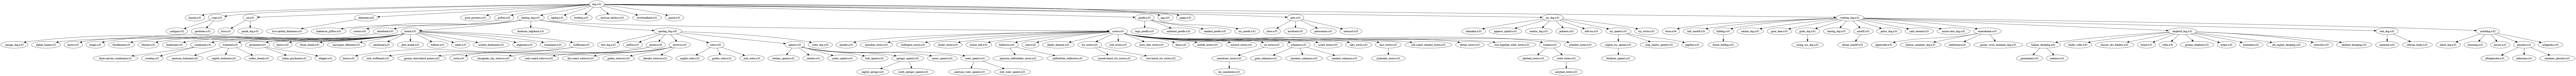

In [18]:
dog_t_below_a = nx.nx_agraph.to_agraph(dog_t_below_g)
dog_t_below_a.layout('dot')
dog_t_below_a.draw('temp.png')
Image(filename='temp.png')